# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import textwrap

plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Arial"

# Read data

In [445]:
df = pd.read_csv('../data/labeled_data_10_publishers_2024.csv')
len(df)

/var/folders/4n/vqmcxbvj75bf0vsl2g3d0z3r0000gq/T/ipykernel_76382/1608182993.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/labeled_data_10_publishers_2024.csv')


155950

In [448]:
category_to_topics = df.groupby('category')['topic'].unique().to_dict()
reversed_category_to_topics = {topic: category for category, topics in category_to_topics.items() for topic in topics}

top30_topics = df['topic'].value_counts().index[:30]
top20_topics = df['topic'].value_counts().index[:20]

pub_order = df.groupby('publisher')['article_lean'].mean().sort_values().index.values
pub_order_full = df.groupby('publisher_full')['article_lean'].mean().sort_values().index.values
cat_order = df.category.value_counts().index.values

# Publisher counts


In [449]:
pub_counts = df.publisher_full.value_counts().reset_index()

In [305]:
website_stats = [
    {"publisher": "nytimes", "monthly_visitors": 444.9, "publisher_full": "New York Times"},
    {"publisher": "cnn", "monthly_visitors": 311.7, "publisher_full": "CNN"},
    {"publisher": "foxnews", "monthly_visitors": 233.2, "publisher_full": "Fox News"},
    {"publisher": "usatoday", "monthly_visitors": 109.5, "publisher_full": "USA Today"},
    {"publisher": "apnews", "monthly_visitors": 82.9, "publisher_full": "Associated Press"},
    {"publisher": "washingtonpost", "monthly_visitors": 72.2, "publisher_full": "Washington Post"},
    {"publisher": "wsj", "monthly_visitors": 67.0, "publisher_full": "Wall Street Journal"},
    {"publisher": "theguardian", "monthly_visitors": 64.2, "publisher_full": "The Guardian"},
    {"publisher": "huffpost", "monthly_visitors": 37.9, "publisher_full": "Huffington Post"},
    {"publisher": "breitbart", "monthly_visitors": 31.5, "publisher_full": "Breitbart"},
]

website_stats = pd.DataFrame(website_stats)

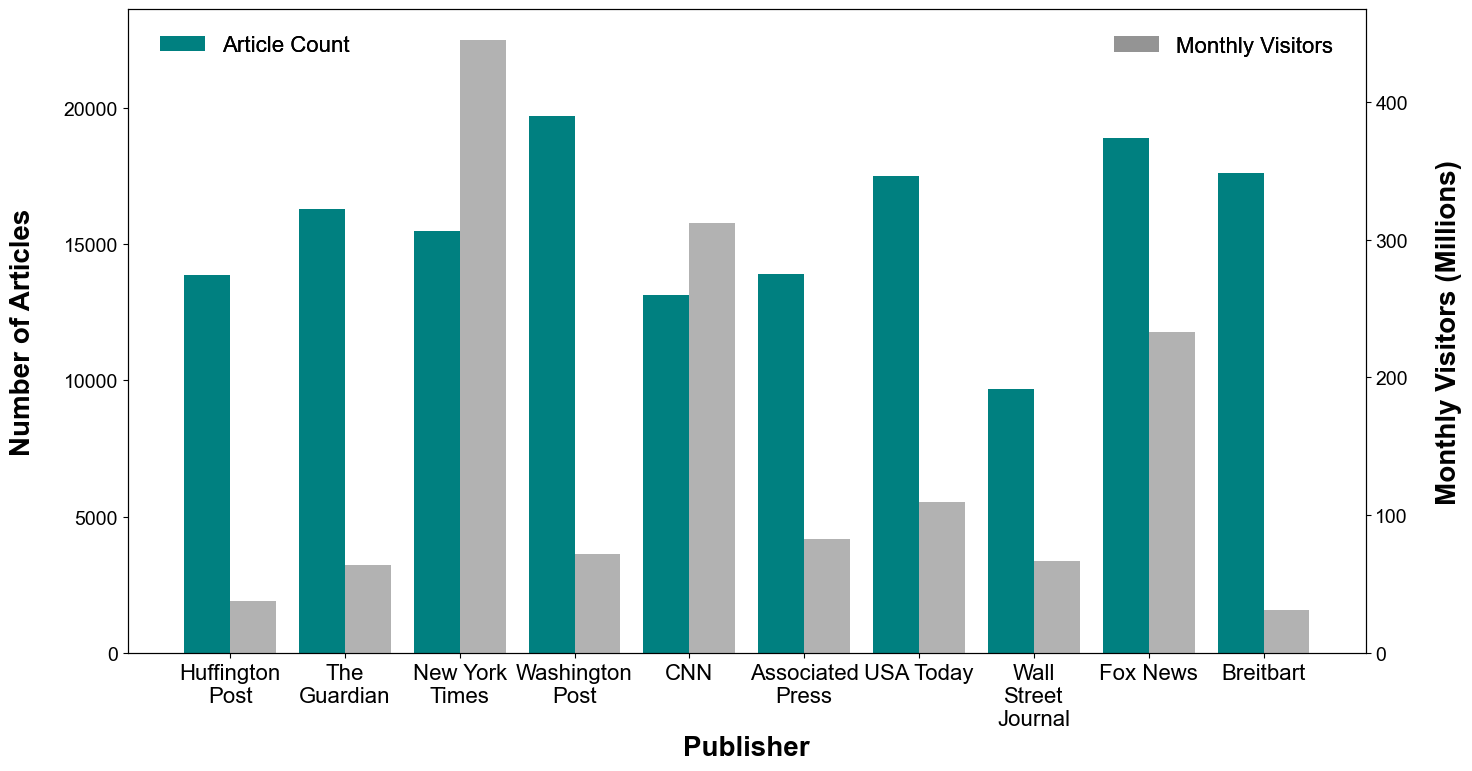

In [306]:
plt.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 20,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 16,
    'figure.titlesize': 22
})

pub_counts_sorted = pub_counts.set_index('publisher_full').loc[pub_order_full].reset_index()
website_stats_sorted = website_stats.set_index('publisher_full').loc[pub_order_full].reset_index()

n = len(pub_order_full)
x = np.arange(n)
bar_width = 0.4

wrapped_labels = [textwrap.fill(label, width=10) for label in pub_order_full]

fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bars_articles = ax1.bar(x - bar_width/2, pub_counts_sorted['count'], 
                        width=bar_width, color='teal', label='Article Count')
bars_visitors = ax2.bar(x + bar_width/2, website_stats_sorted['monthly_visitors'], 
                        width=bar_width, color='gray', alpha=0.6, label='Monthly Visitors')

ax1.set_xticks(x)
ax1.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=16)

ax1.set_ylabel('Number of Articles', fontsize=20, fontweight='bold', labelpad=20)
ax2.set_ylabel('Monthly Visitors (Millions)', fontsize=20, fontweight='bold', labelpad=20)
ax1.set_xlabel('Publisher', fontsize=20, fontweight='bold')

ax1.set_ylim(0, pub_counts_sorted['count'].max() * 1.2)

legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon=False)
legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(0.99, 0.99), frameon=False)
fig.add_artist(legend1)
fig.add_artist(legend2)

plt.savefig('../plots/publisher_counts.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

# Topic counts


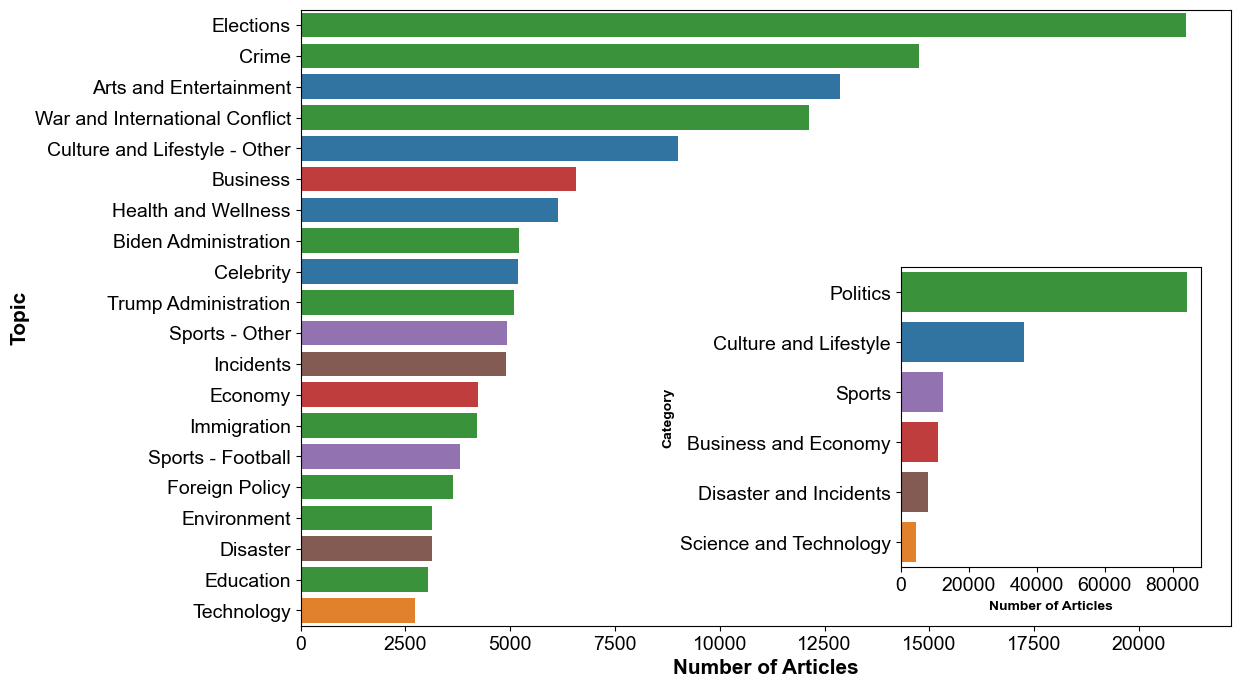

In [307]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sorted_topics_by_size = df['topic'].value_counts()[:20].index

fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=df, y='topic', hue='category', order=sorted_topics_by_size, ax=ax)

ax.legend_.remove()

ax_inset = inset_axes(ax, width=3, height=3, 
                      bbox_to_anchor=(0.7, 0.3, 0.28, 0.3), 
                      bbox_transform=ax.transAxes)

ax_inset.set_ylabel('Category', fontsize=10, fontweight='bold')
ax_inset.set_xlabel('Number of Articles', fontsize=10, fontweight='bold')

sns.countplot(data=df, y='category', hue='category', order=cat_order, ax=ax_inset)

ax.set_ylabel('Topic', fontsize=15, fontweight='bold')
ax.set_xlabel('Number of Articles', fontsize=15, fontweight='bold')

plt.savefig('../plots/topic_counts.pdf', bbox_inches='tight')

plt.show()

# Subtopic coverage

/var/folders/4n/vqmcxbvj75bf0vsl2g3d0z3r0000gq/T/ipykernel_76382/819920565.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=15)


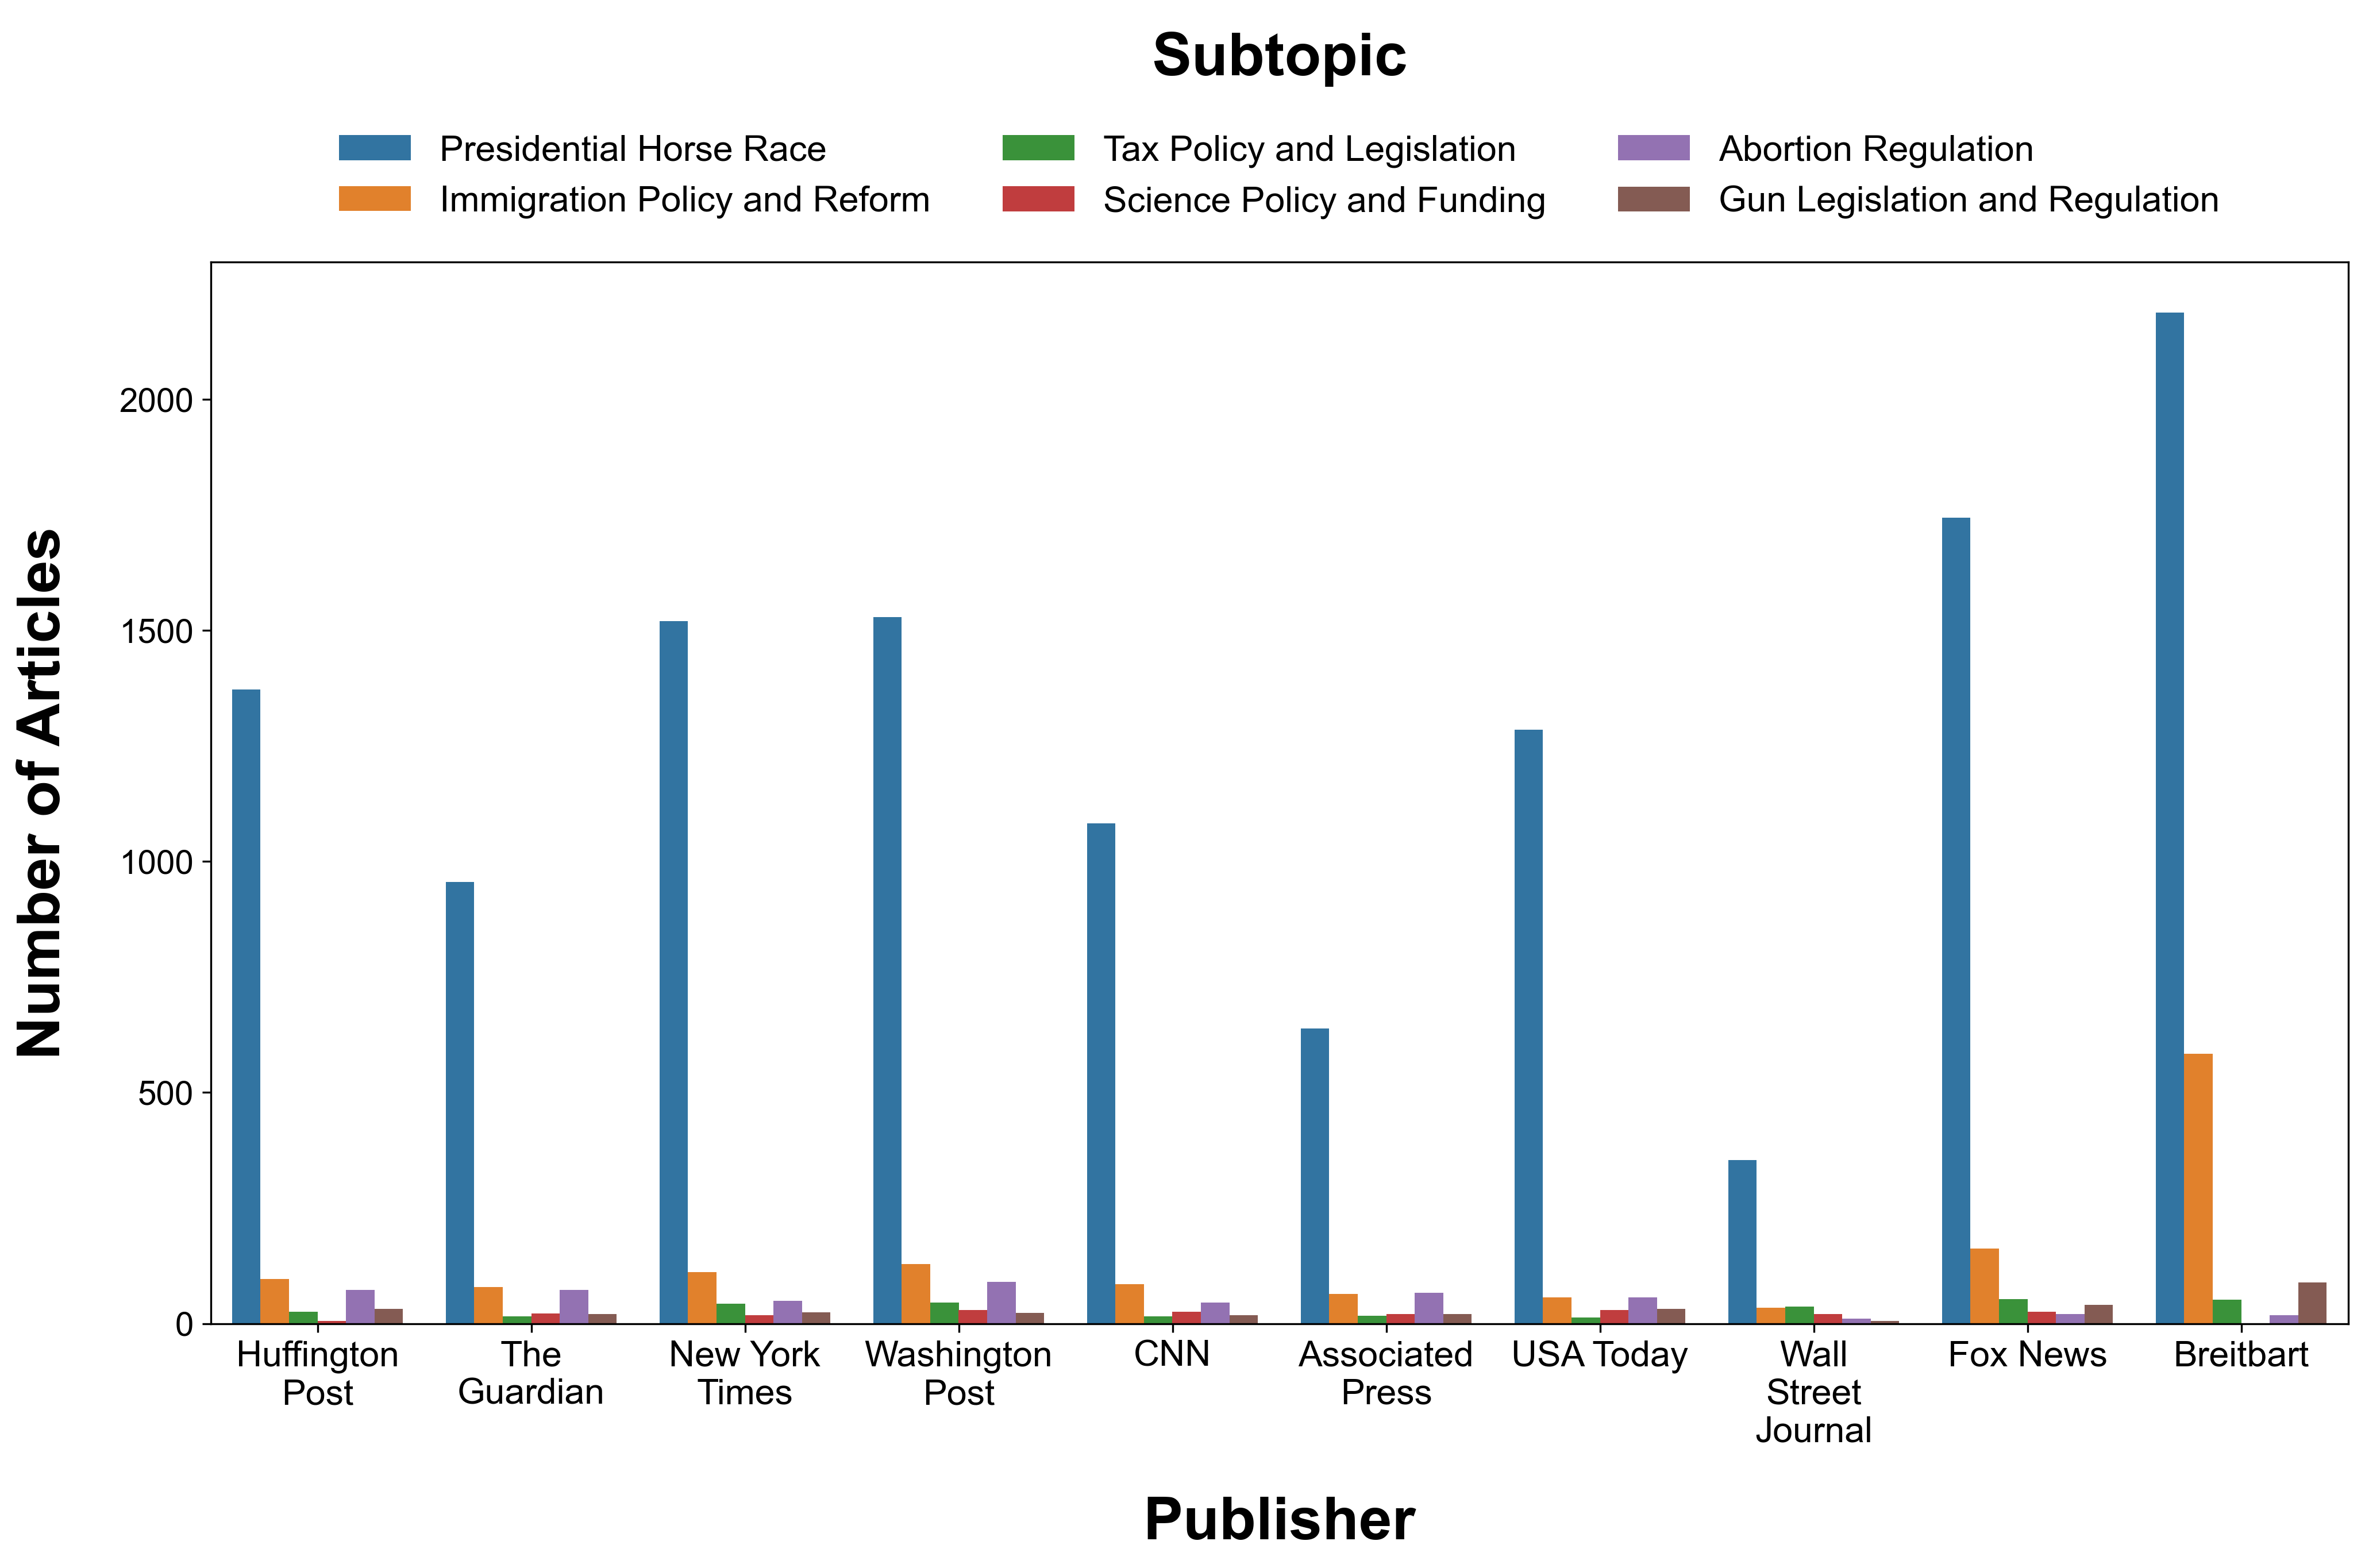

In [433]:
relevant_subtopics = ['Presidential Horse Race', 
                      #  "Biden's Age", 
                      # 'Monetary Policy', 
                      'Immigration Policy and Reform', 
                      'Tax Policy and Legislation', 
                      'Science Policy and Funding',
                      'Abortion Regulation', 
                      'Gun Legislation and Regulation']

df_filtered = df[df['subtopic'].isin(relevant_subtopics)]

article_counts = df_filtered.groupby(['publisher_full', 'subtopic']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8), dpi=300)

g = sns.countplot(data=df_filtered, x='publisher_full', hue='subtopic', order=pub_order_full, hue_order=relevant_subtopics)

wrapped_labels = [textwrap.fill(label.get_text(), width=10) for label in g.get_xticklabels()]
g.set_xticklabels(wrapped_labels, rotation=0, ha='center', fontsize=15)

plt.xlabel('Publisher', fontsize=25, fontweight='bold', labelpad=20)

plt.ylabel('Number of Articles', fontsize=25, fontweight='bold', labelpad=20)

plt.legend(title='Subtopic', loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=3, fontsize=15, frameon=False)

legend = g.get_legend()
if legend is not None:
  legend.get_title().set_fontsize(25)
  legend.get_title().set_fontweight('bold')
  legend._legend_box.sep = 20  

plt.savefig('../plots/subtopic_coverage.pdf', bbox_inches='tight')

plt.show()

# Article tone

In [309]:
topic_tone = df[df.topic.isin(top30_topics)].groupby(['topic', 'category'])[['article_tone', 'article_lean']].mean().reset_index()
topic_tone['topic_count'] = topic_tone['topic'].map(df['topic'].value_counts())
topic_tone['cat_count'] = topic_tone['category'].map(df['category'].value_counts())

topic_tone = topic_tone.sort_values(by='article_tone')
#topic_tone

In [310]:
palette = {category: color for category, color in zip(df['category'].unique(), sns.color_palette(n_colors=df['category'].nunique()))}

/var/folders/4n/vqmcxbvj75bf0vsl2g3d0z3r0000gq/T/ipykernel_76382/327157359.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


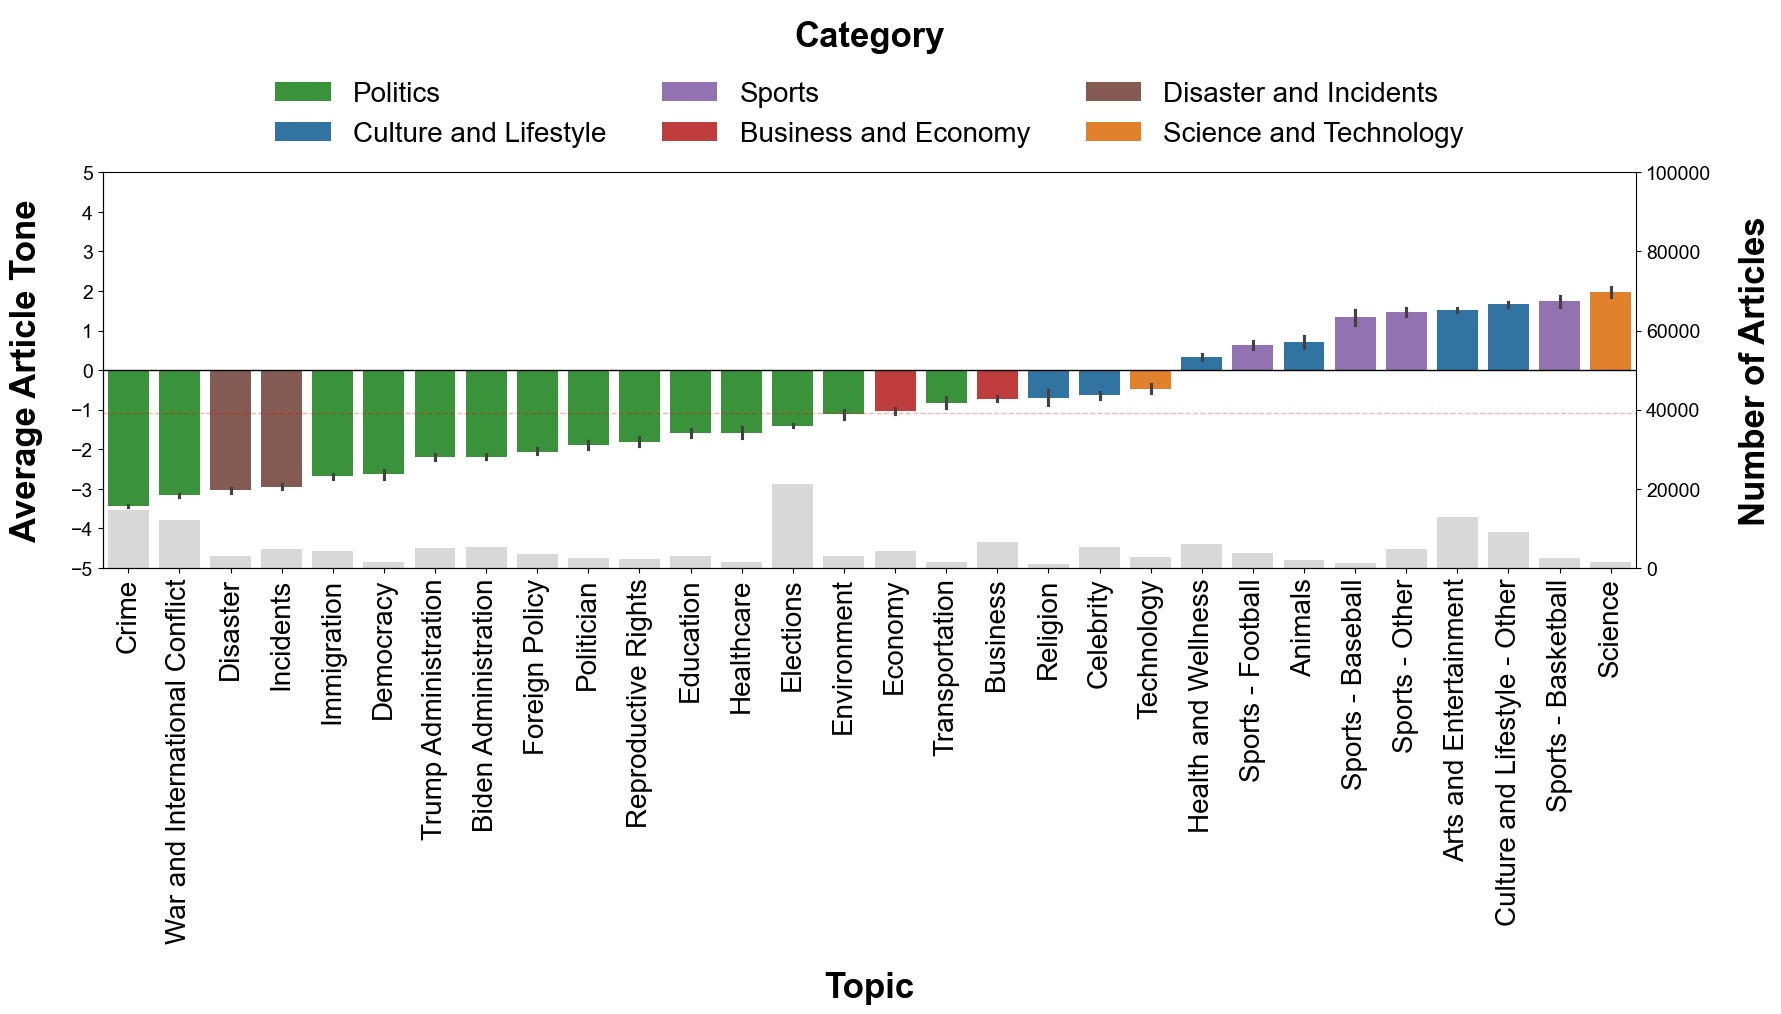

In [408]:
g = sns.catplot(
    data=df[df.topic.isin(top30_topics)], 
    y='article_tone', 
    x='topic', 
    kind='bar', 
    order=topic_tone.topic, 
    hue='category', 
    hue_order=cat_order, 
    palette=palette, 
    legend_out=False
)

g.fig.set_size_inches(30, 5)

g.set(ylim=(-5, 5))

g.set_axis_labels('Topic', 'Average Article Tone', fontsize=25, fontweight='bold', labelpad=20)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=20)
    ax.set_yticks(range(-5, 6))

for ax in g.axes.flat:
    ax2 = ax.twinx()
    sns.barplot(
        data=topic_tone, 
        x='topic', 
        y='topic_count', 
        ax=ax2, 
        alpha=0.3, 
        color='gray', 
        order=topic_tone.topic
    )
    ax2.set_ylabel('Number of Articles', fontsize=25, fontweight='bold', labelpad=20)
    ax2.set_ylim(0, 100000)

for ax in g.axes.flat:
    ax.axhline(df.article_tone.mean(), color='red', linestyle='--', linewidth=1, alpha=0.3)

for ax in g.axes.flat:
    ax.axhline(0, color='black', linestyle='-', linewidth=1)

g.add_legend(title='Category', bbox_to_anchor=(0.5, 1), loc='lower center', fontsize=20, ncol=3)
g.legend._legend_box.sep = 20
g.legend.set_frame_on(False)

g.legend.set_title('Category', prop={'size': 25, 'weight': 'bold'})

plt.savefig('../plots/article_tone.pdf', bbox_inches='tight')

plt.show()

# Article lean

In [312]:
topic_lean = topic_tone[topic_tone.topic.isin(top20_topics)].sort_values(by=['cat_count', 'topic_count'], ascending=False)
#topic_lean

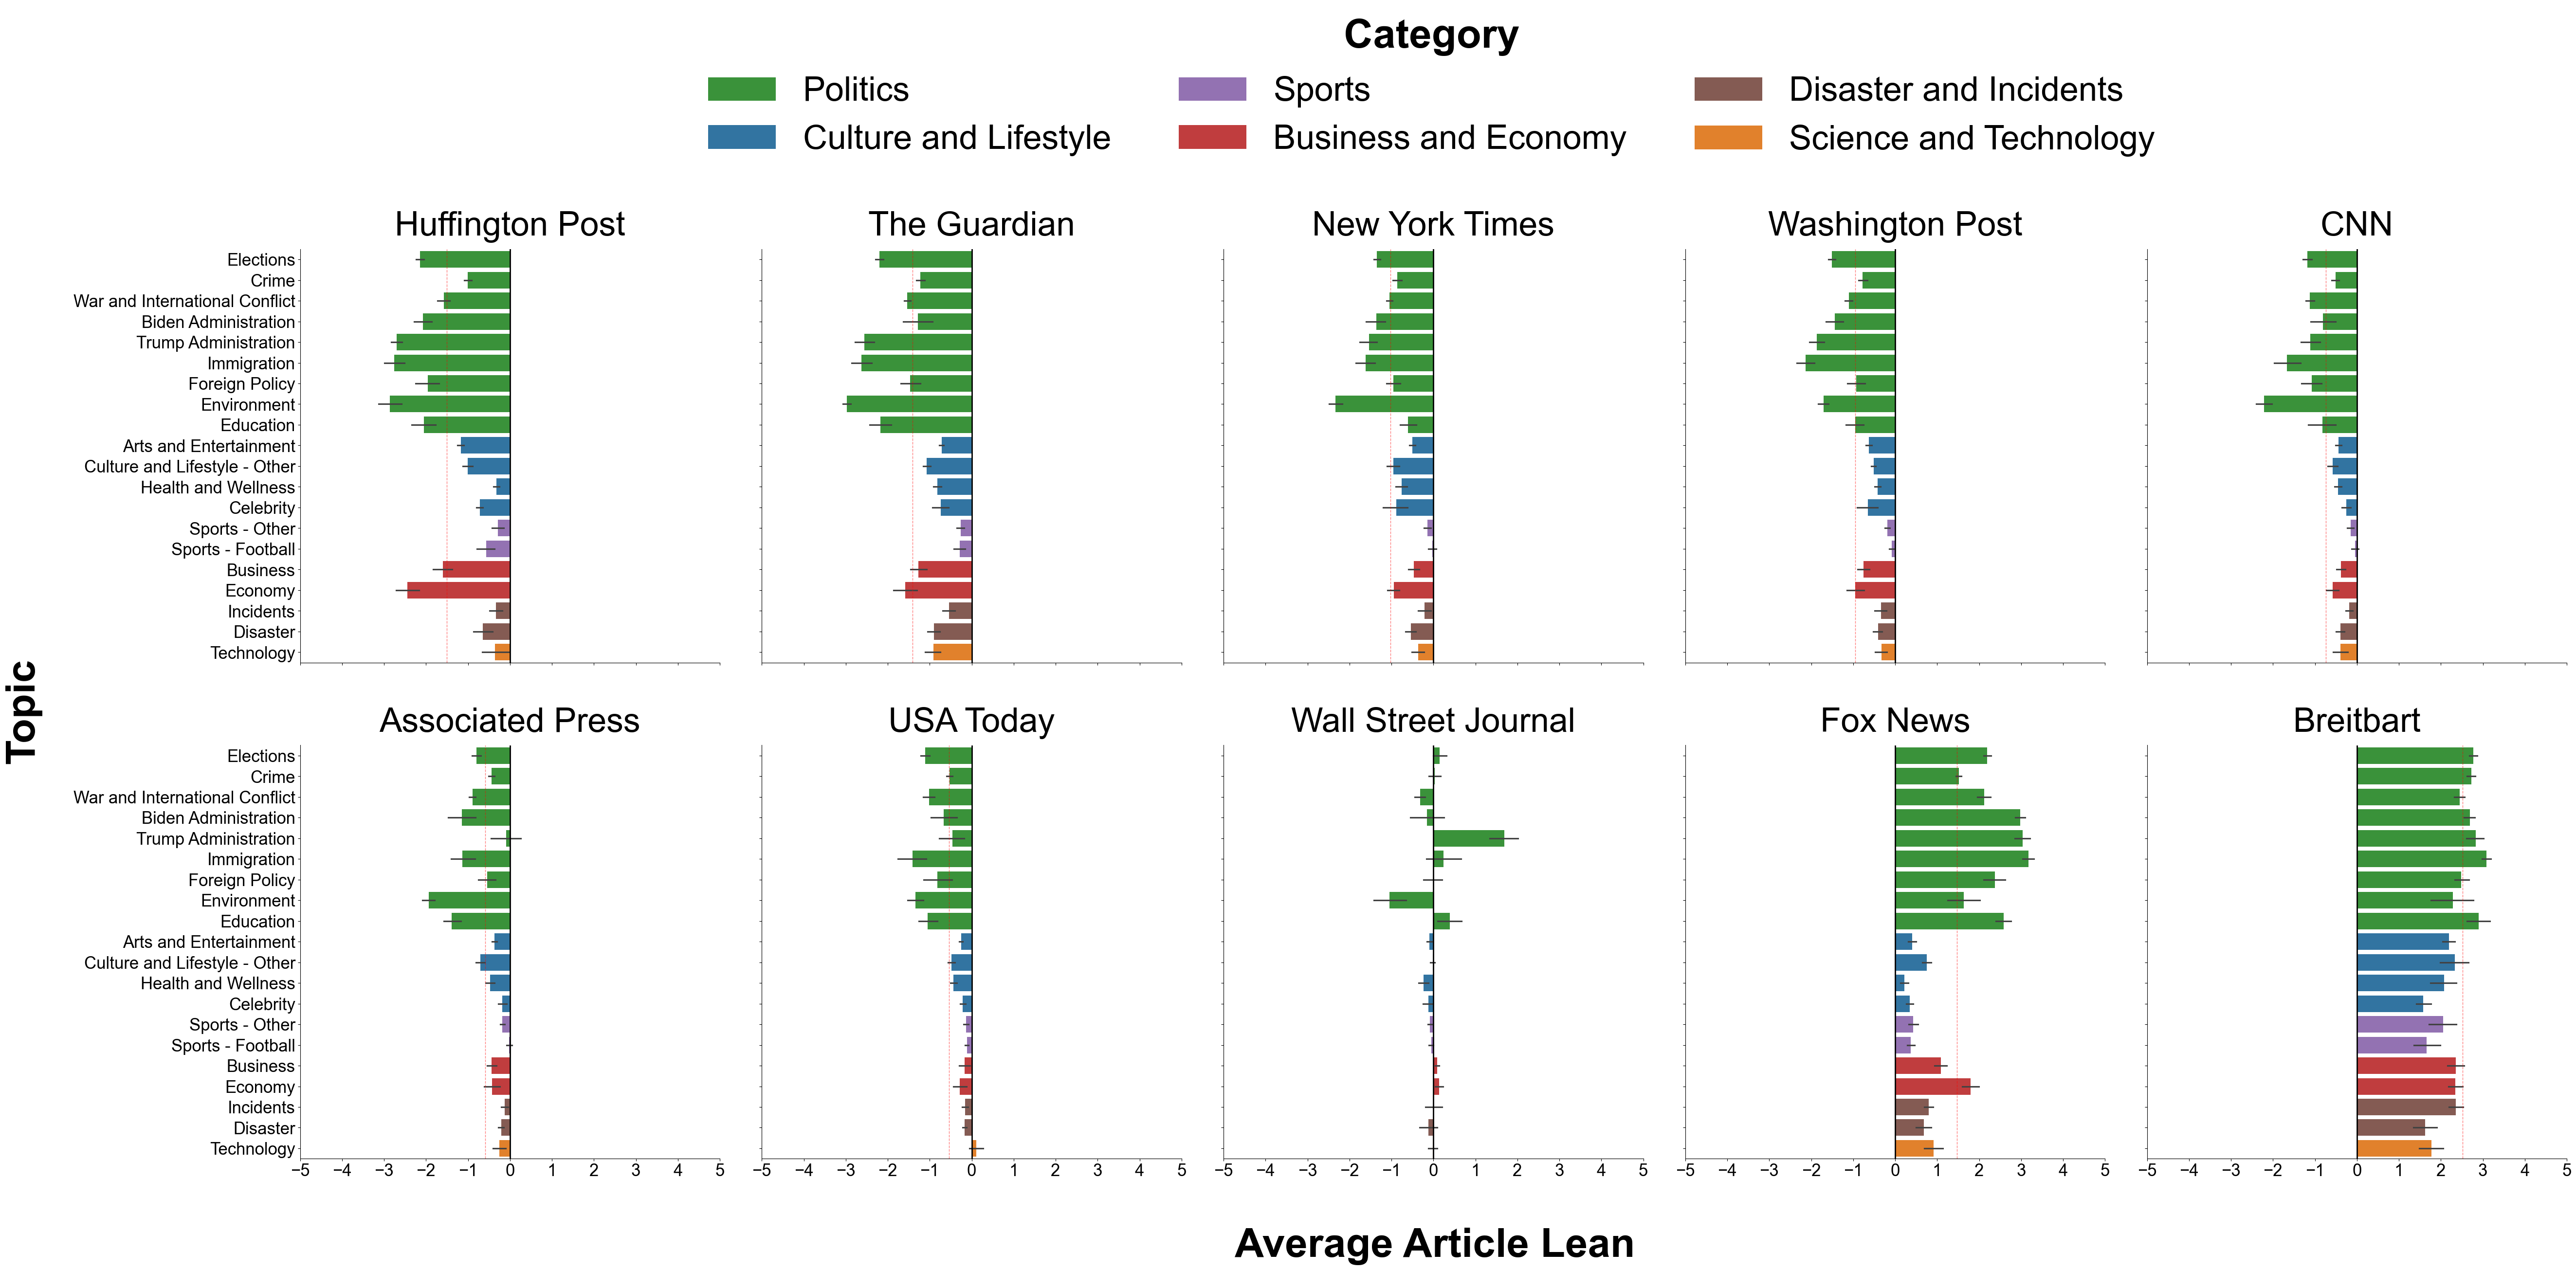

In [432]:
g = sns.catplot(data=df, x='article_lean', y='topic', col='publisher_full', col_wrap=5, kind='bar', hue='category', order=topic_lean.topic, col_order=pub_order_full, height=10, legend_out=False, hue_order=cat_order, palette=palette)
g.set_titles("{col_name}", size=50, pad=20) 
g.add_legend(title='Category', bbox_to_anchor=(0.9, 1.15), loc='lower left', ncol=3, fontsize=50)

for ax, publisher in zip(g.axes.flat, pub_order_full):
    mean_lean = df[df.publisher_full == publisher].article_lean.mean()
    ax.axvline(mean_lean, color='red', linestyle='--', linewidth=1, alpha=0.5)

g.legend.set_title('Category', prop={'size': 60, 'weight': 'bold'})
g.legend._legend_box.sep = 30
g.legend.set_frame_on(False)
g.fig.subplots_adjust(hspace=0.2, wspace=0.1)

for ax in g.axes.flat:
    ax.tick_params(axis='y', labelsize=25)

g.fig.text(0.53, -0.05, 'Average Article Lean', ha='center', va='center', fontsize=60, fontweight='bold')
g.fig.text(-0.05, 0.5, 'Topic', ha='center', va='center', rotation=90, fontsize=60, fontweight='bold')

for ax in g.axes.flat:
    ax.set_xlabel('', fontsize=50)
    ax.set_ylabel('', fontsize=50)
    ax.axvline(0, color='black', linestyle='-', linewidth=2)
    

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=25)
    ax.set_xticks(range(-5, 6))

g.savefig('../plots/article_lean.pdf', bbox_inches='tight')

plt.show()

# Headline vs article

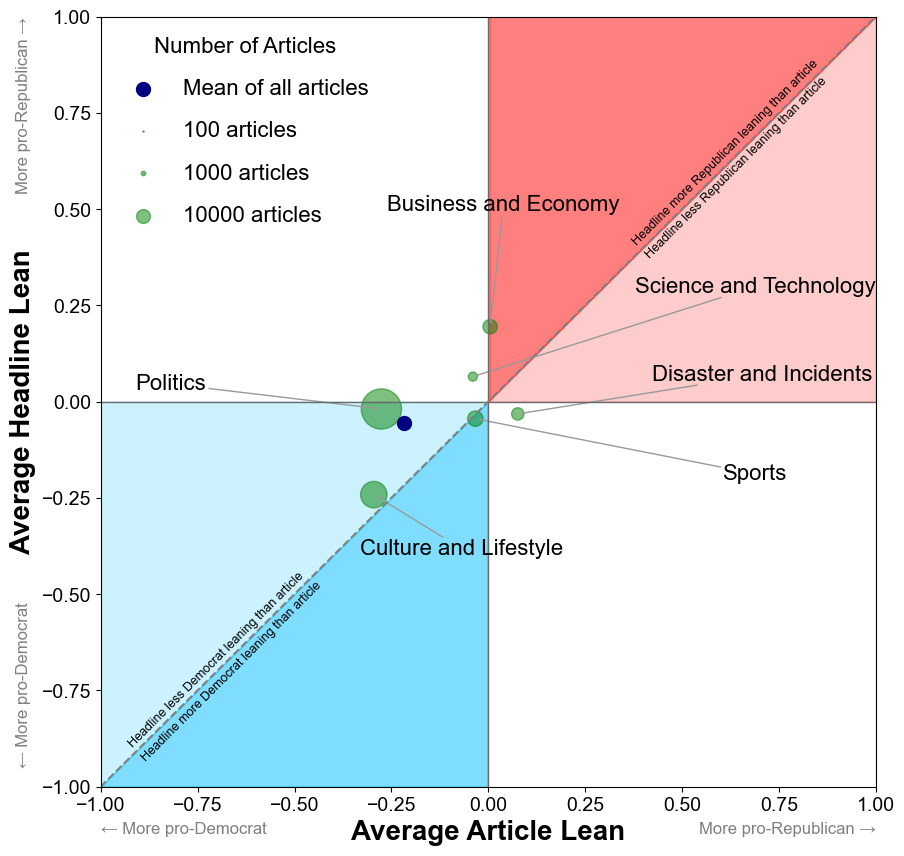

In [435]:
grouped = df.groupby('category').agg({
    'article_lean': 'mean',
    'title_lean': 'mean',
    'article_id': 'count'
})

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

x = np.linspace(-1, 1, 400)
y = x
ax.fill_between(x, y, 1, where=(x > 0), interpolate=True, color='red', alpha=0.5)
ax.fill_between(x, y, -1, where=(x < 0), interpolate=True, color='deepskyblue', alpha=0.5)

ax.fill_between(x, y, 0, where=(x > 0), interpolate=True, color='red', alpha=0.2)
ax.fill_between(x, y, 0, where=(x < 0), interpolate=True, color='deepskyblue', alpha=0.2)
mean_article_lean = df['article_lean'].mean()
mean_title_lean = df['title_lean'].mean()


scatter = ax.scatter(grouped['article_lean'], grouped['title_lean'], s=grouped['article_id']*0.01, c='green', alpha=0.5)
ax.scatter(mean_article_lean, mean_title_lean, c='navy', s=100, label='Mean of all articles')

ax.set_xlabel('Average Article Lean', fontsize=20, fontweight='bold')
ax.set_ylabel('Average Headline Lean', fontsize=20, fontweight='bold')

ax.axhline(0, color='dimgray', linewidth=1)
ax.axvline(0, color='dimgray', linewidth=1)

ax.plot([-3, 3], [-3, 3], color='gray', linestyle='--')


texts = []
for i in grouped.index:
    x = grouped.loc[i, 'article_lean']
    y = grouped.loc[i, 'title_lean']
    texts.append(ax.text(x, y, i))

adjust_text(
    texts, 
    expand=(4, 4),
    arrowprops=dict(
        arrowstyle="->", 
        color='#999999',
        lw=1
    ),
    ax=fig.axes[0]
)

ax.text(1.1/3, 1.2/3, "Headline more Republican leaning than article", fontsize=9, rotation=45, horizontalalignment='left', verticalalignment='bottom')
ax.text(1.2/3, 1.1/3, "Headline less Republican leaning than article", fontsize=9, rotation=45, horizontalalignment='left', verticalalignment='bottom')

ax.text(-2.7/3, -2.82/3, "Headline more Democrat leaning than article", fontsize=9, rotation=45, horizontalalignment='left', verticalalignment='bottom')
ax.text(-2.8/3, -2.71/3, "Headline less Democrat leaning than article", fontsize=9, rotation=45, horizontalalignment='left', verticalalignment='bottom')

ax.text(1.0, -1.09, "More pro-Republican →", alpha=0.5,
        fontsize=12, rotation=0, horizontalalignment='right', verticalalignment='top')

ax.text(-1.0, -1.09, "← More pro-Democrat", alpha=0.5,
        fontsize=12, rotation=0, horizontalalignment='left', verticalalignment='top')

ax.text(-1.18, 1, "More pro-Republican →", alpha=0.5,
        fontsize=12, rotation=90, horizontalalignment='right', verticalalignment='top')

ax.text(-1.18, -0.52, "← More pro-Democrat", alpha=0.5,
        fontsize=12, rotation=90, horizontalalignment='right', verticalalignment='top')

legend_sizes = [100, 1000, 10000] 

for size in legend_sizes:
    ax.scatter([], [], s=size*0.01, c='green', alpha=0.5, label=f'{size} articles')

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Number of Articles')

plt.savefig('../plots/headline_vs_article_lean.pdf', bbox_inches='tight')

plt.show()

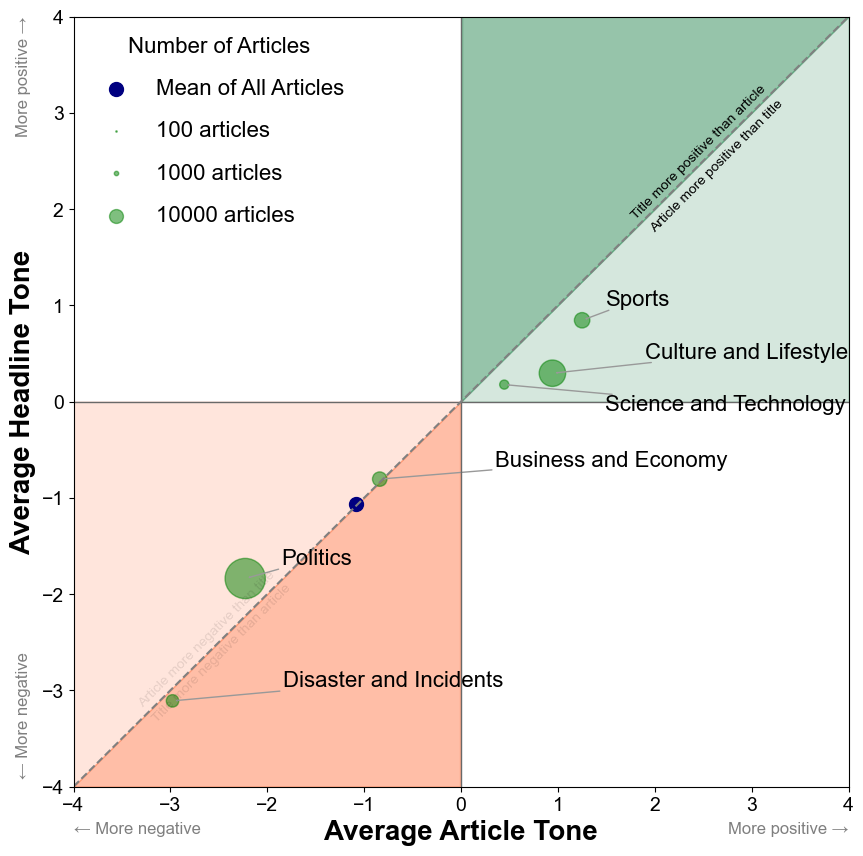

In [434]:
grouped = df.groupby('category').agg({
    'article_tone': 'mean',
    'title_tone': 'mean',
    'article_id': 'count'
})

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

x = np.linspace(-4, 4, 400)
y = x
ax.fill_between(x, y, 4, where=(x > 0), interpolate=True, color='seagreen', alpha=0.5)
ax.fill_between(x, y, -4, where=(x < 0), interpolate=True, color='coral', alpha=0.5)

ax.fill_between(x, y, 0, where=(x > 0), interpolate=True, color='seagreen', alpha=0.2)
ax.fill_between(x, y, 0, where=(x < 0), interpolate=True, color='coral', alpha=0.2)

mean_article_tone = df['article_tone'].mean()
mean_title_tone = df['title_tone'].mean()

ax.scatter(mean_article_tone, mean_title_tone, c='navy', s=100, label='Mean of All Articles')

scatter = ax.scatter(grouped['article_tone'], grouped['title_tone'], s=grouped['article_id']*0.01, c='green', alpha=0.5)

ax.set_xlabel('Average Article Tone', fontsize=20, fontweight='bold')
ax.set_ylabel('Average Headline Tone', fontsize=20, fontweight='bold')

ax.axhline(0, color='dimgray', linewidth=1)
ax.axvline(0, color='dimgray', linewidth=1)

ax.plot([-4, 4], [-4, 4], color='gray', linestyle='--')

texts = []
for i in grouped.index:
    x = grouped.loc[i, 'article_tone']
    y = grouped.loc[i, 'title_tone']
    texts.append(ax.text(x, y, i))


adjust_text(
    texts, 
    expand=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color='#999999',
        lw=1
    ),
    ax=fig.axes[0]
)

ax.text(1.3*4/3, 1.4*4/3, "Title more positive than article", fontsize=10, rotation=45, horizontalalignment='left', verticalalignment='bottom')
ax.text(1.45*4/3, 1.3*4/3, "Article more positive than title", fontsize=10, rotation=45, horizontalalignment='left', verticalalignment='bottom')

ax.text(-1.3*4/3, -1.4*4/3, "Title more negative than article", fontsize=10, rotation=45, horizontalalignment='right', verticalalignment='top', alpha=0.1)
ax.text(-1.42*4/3, -1.3*4/3, "Article more negative than title", fontsize=10, rotation=45, horizontalalignment='right', verticalalignment='top', alpha=0.1)

ax.text(1.0*4, -1.09*4, "More positive →", alpha=0.5,
        fontsize=12, rotation=0, horizontalalignment='right', verticalalignment='top')

ax.text(-1.0*4, -1.09*4, "← More negative", alpha=0.5,
        fontsize=12, rotation=0, horizontalalignment='left', verticalalignment='top')

ax.text(-1.11*4, 1*4, "More positive →", alpha=0.5,
        fontsize=12, rotation=90, horizontalalignment='right', verticalalignment='top')

ax.text(-1.11*4, -0.65*4, "← More negative", alpha=0.5,
        fontsize=12, rotation=90, horizontalalignment='right', verticalalignment='top')

legend_sizes = [100, 1000, 10000] 
for size in legend_sizes:
    ax.scatter([], [], s=size*0.01, c='green', alpha=0.5, label=f'{size} articles')

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Number of Articles')

plt.savefig('../plots/headline_vs_article_tone.pdf', bbox_inches='tight')

plt.show()

# Lean vs focus

In [316]:
publisher_focus = df.groupby('publisher').agg({
    'sent_focus_rep': 'sum',
    'sent_focus_dem': 'sum'
}).reset_index()

publisher_focus['total_focus_sentences'] = publisher_focus['sent_focus_rep'] + publisher_focus['sent_focus_dem']

publisher_focus = publisher_focus[publisher_focus['total_focus_sentences'] > 0]

publisher_focus['focus_numeric'] = (publisher_focus['sent_focus_rep'] - publisher_focus['sent_focus_dem']) / publisher_focus['total_focus_sentences']

focus_bias = publisher_focus[['publisher', 'focus_numeric']].copy()

article_lean_mean = df.groupby('publisher')['article_lean'].mean().reset_index()
focus_bias = focus_bias.merge(article_lean_mean, on='publisher', how='left')

focus_bias = focus_bias.merge(df[['publisher', 'publisher_full']].drop_duplicates(), on='publisher', how='left')
#focus_bias

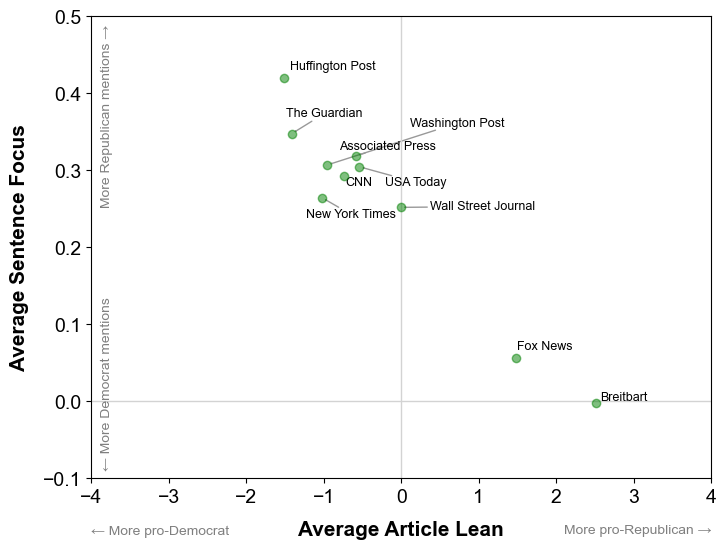

In [317]:
focus_bias = focus_bias.dropna(subset=['article_lean', 'focus_numeric']) 
focus_bias['article_lean'] = pd.to_numeric(focus_bias['article_lean'], errors='coerce')  
focus_bias['focus_numeric'] = pd.to_numeric(focus_bias['focus_numeric'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.scatter(focus_bias['article_lean'], focus_bias['focus_numeric'], c='green', alpha=0.5, zorder=4)

slope, intercept = np.polyfit(focus_bias['article_lean'].dropna(), focus_bias['focus_numeric'].dropna(), 1)
x_vals = np.linspace(-4, 4, 100)
y_vals = np.polyval([slope, intercept], x_vals)

plt.plot(x_vals, y_vals, linestyle='--', color='red', alpha=0, linewidth=1)

plt.xlabel('Average Article Lean', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Average Sentence Focus', fontsize=15, fontweight='bold', labelpad=10)

texts = []
for i, row in focus_bias.iterrows():
    texts.append(plt.text(row['article_lean'], row['focus_numeric'], row['publisher_full'], fontsize=9))

adjust_text(
    texts, 
    expand=(1, 1),  
    force_static=(1, 1), 
    force_text=(1, 1),  
    only_move={'points': 'xy', 'text': 'xy'},  
    avoid_self=True, 
    arrowprops=dict(
        arrowstyle="->", 
        color='#999999',
        lw=1
    ),
)

plt.xlim(-4, 4)
plt.ylim(-0.1, 0.5)

plt.grid(False)
plt.axhline(0, color='lightgray', linewidth=1)
plt.axvline(0, color='lightgray', linewidth=1)

plt.text(4, -0.16, "More pro-Republican →", alpha=0.5,
        fontsize=10, rotation=0, horizontalalignment='right', verticalalignment='top')

plt.text(-4, -0.16, "← More pro-Democrat", alpha=0.5,
        fontsize=10, rotation=0, horizontalalignment='left', verticalalignment='top')

plt.text(-3.8, 0.49, "More Republican mentions →", alpha=0.5,
        fontsize=10, rotation=90, horizontalalignment='center', verticalalignment='top')

plt.text(-3.8, -0.09, "← More Democrat mentions", alpha=0.5,
        fontsize=10, rotation=90, horizontalalignment='center', verticalalignment='bottom')

plt.savefig('../plots/sentence_focus_vs_article_lean.pdf', bbox_inches='tight')
plt.show()